In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.cluster import KMeans


In [3]:
df = pd.read_csv("/Users/rujutajoshi/Sources/GitHub/Task 2/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.shape


(200, 5)

In [8]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.dtypes


CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [10]:
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='count', ylabel='Gender'>

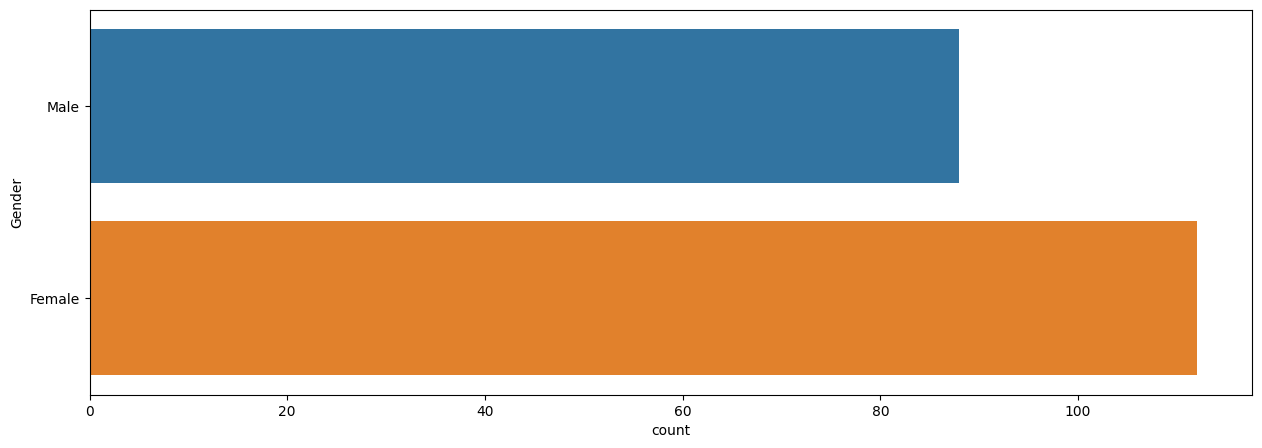

In [11]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)

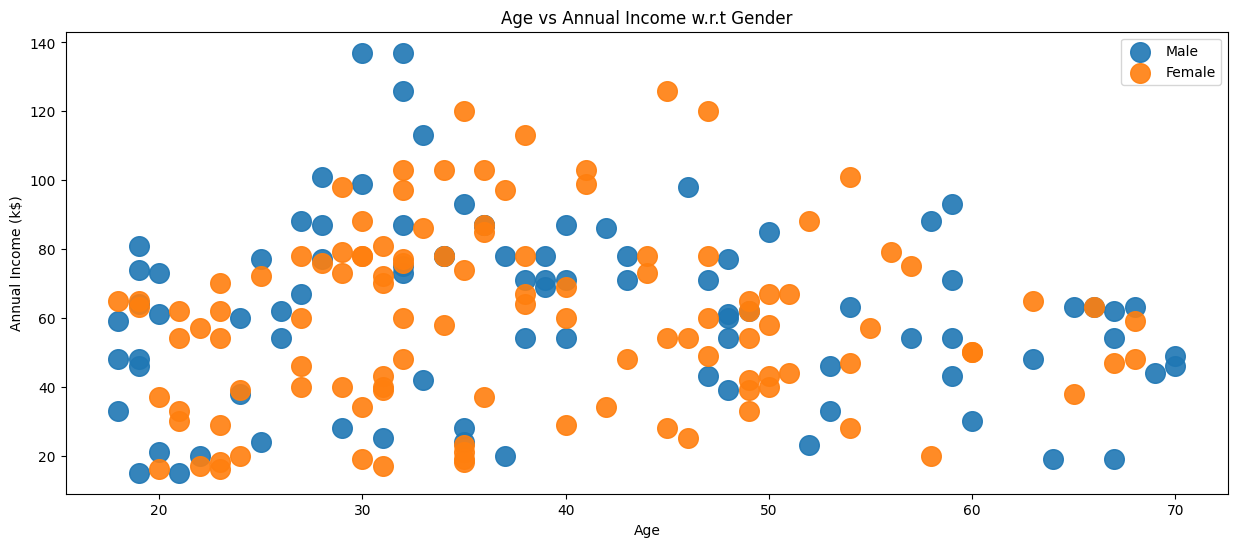

In [17]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.9 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()

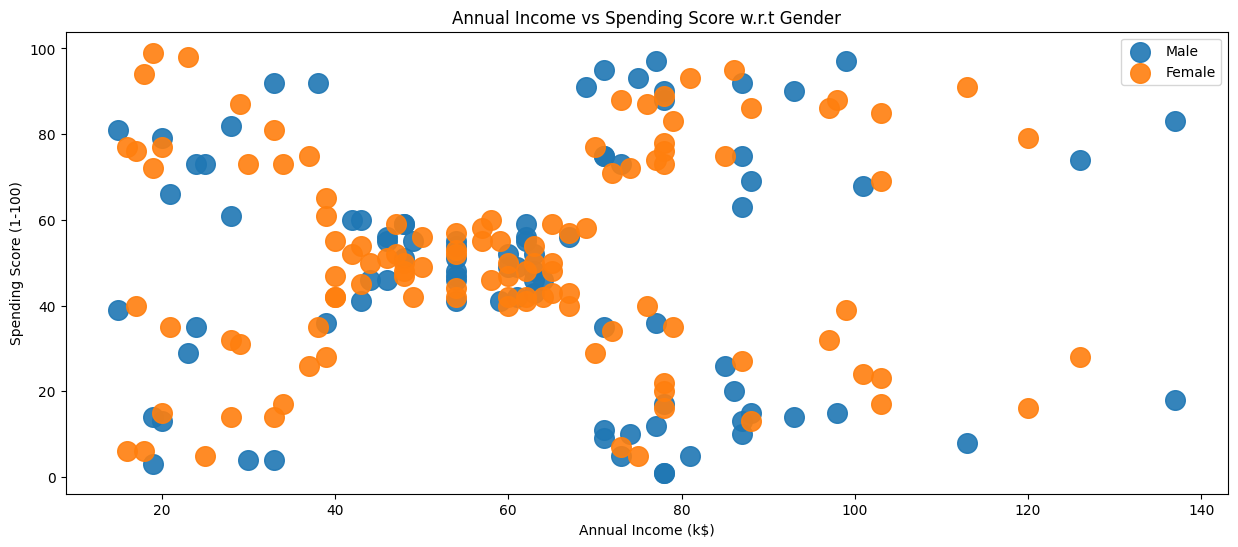

In [16]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.9 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

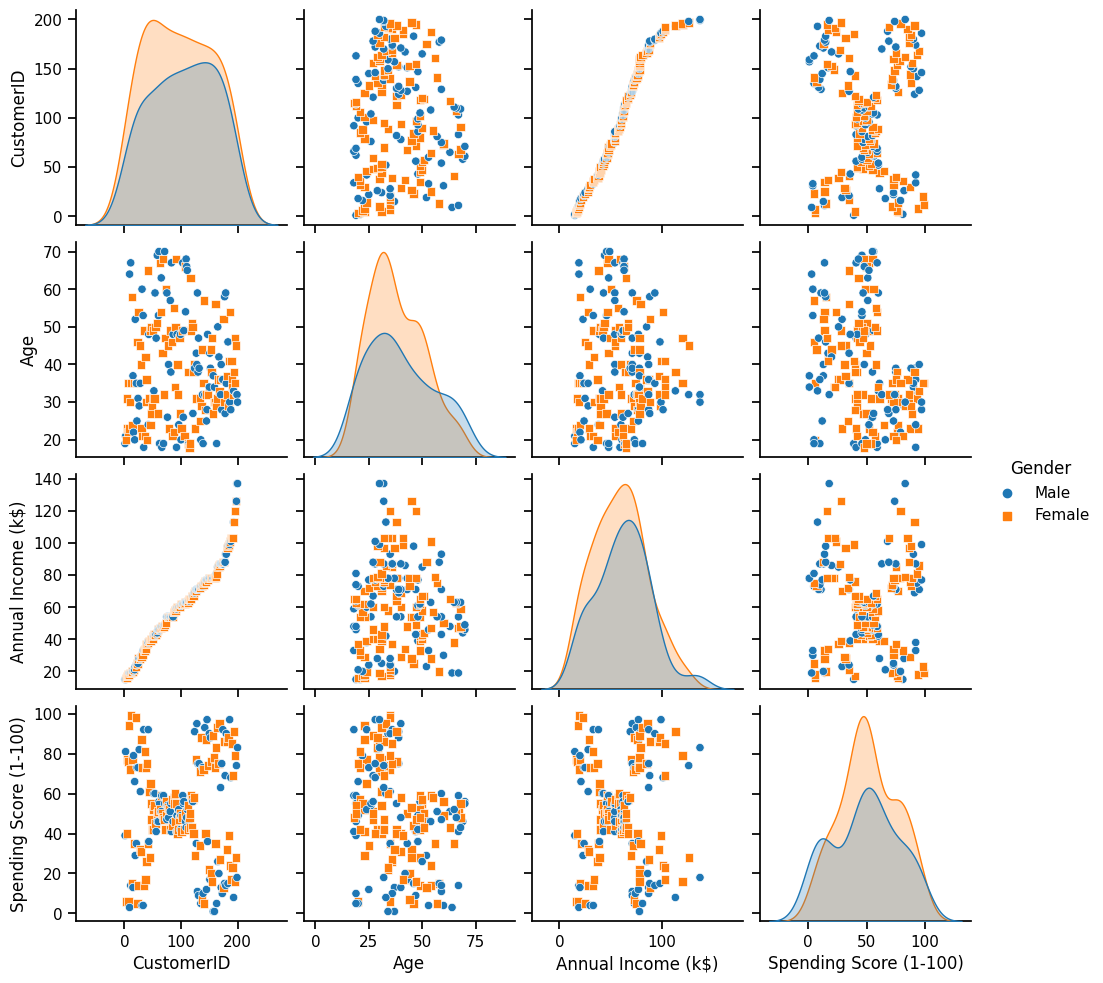

In [20]:

sns.pairplot(df, hue="Gender", markers=["o", "s"], diag_kind='kde',)

Text(0.5, 1.0, 'Bar Plot of Spending Score vs. Age')

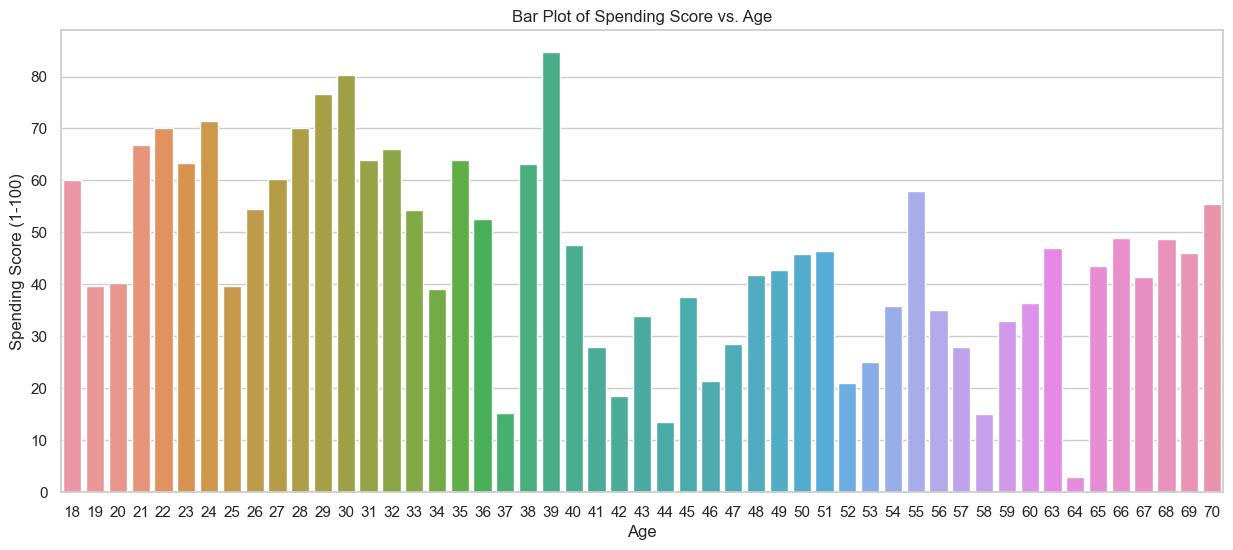

In [28]:

plt.figure(figsize=(15, 6))  # Adjust the figure size if needed
sns.barplot(x="Age", y="Spending Score (1-100)", data=df, ci=None)

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("Bar Plot of Spending Score vs. Age")


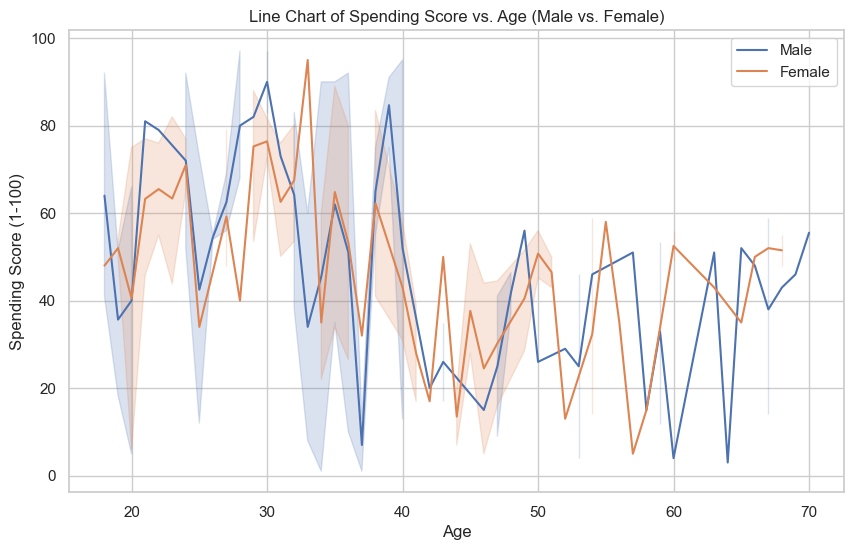

In [29]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Age", y="Spending Score (1-100)", data=df[df['Gender'] == 'Male'], label="Male")

# Create a line plot for female customers
sns.lineplot(x="Age", y="Spending Score (1-100)", data=df[df['Gender'] == 'Female'], label="Female")

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("Line Chart of Spending Score vs. Age (Male vs. Female)")

# Show legend
plt.legend()

In [43]:
X = df.iloc[:, [3,4]].values

In [38]:
X


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [44]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS values')

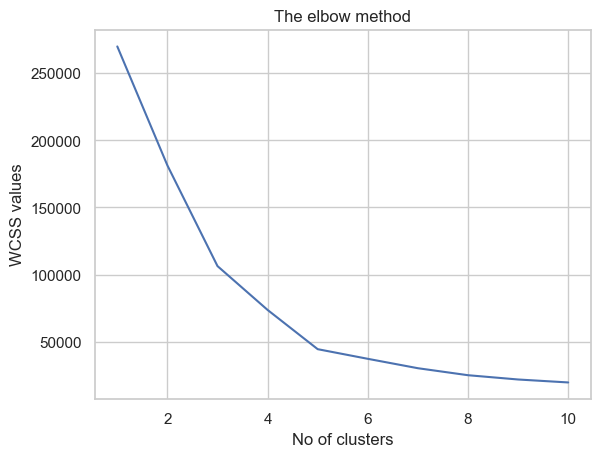

In [46]:
plt.plot(range(1,11), wcss)
plt.title("The elbow method",loc='center')
plt.xlabel("No of clusters")
plt.ylabel("WCSS values")


In [47]:
kmeans_model = KMeans(n_clusters=5,init='k-means++',random_state=0)

In [48]:
y_pred = kmeans_model.fit_predict(X)

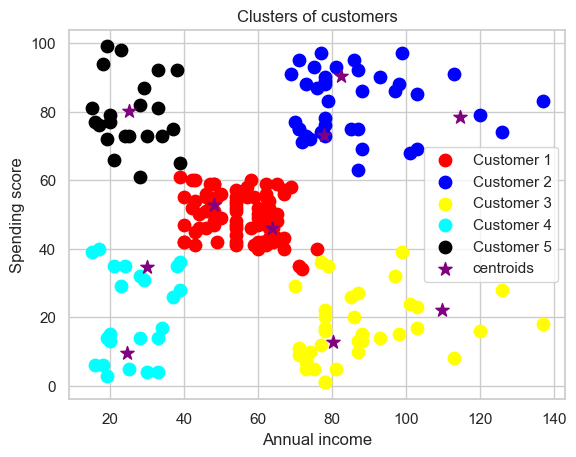

In [52]:
plt.scatter(X[y_pred == 0,0], X[y_pred == 0,1], s = 80, c = "red", label = "Customer 1")
plt.scatter(X[y_pred == 1,0], X[y_pred == 1,1], s = 80, c = "blue", label = "Customer 2")
plt.scatter(X[y_pred == 2,0], X[y_pred == 2,1], s = 80, c = "yellow", label = "Customer 3")
plt.scatter(X[y_pred == 3,0], X[y_pred == 3,1], s = 80, c = "cyan", label = "Customer 4")
plt.scatter(X[y_pred == 4,0], X[y_pred == 4,1], s = 80, c = "black", label = "Customer 5")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = "purple", marker = "*", label = "centroids")
plt.title("Clusters of customers")
plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.legend()

In [55]:
x = df.iloc[:, [2,3,4]].values

In [56]:
x


array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [58]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS values')

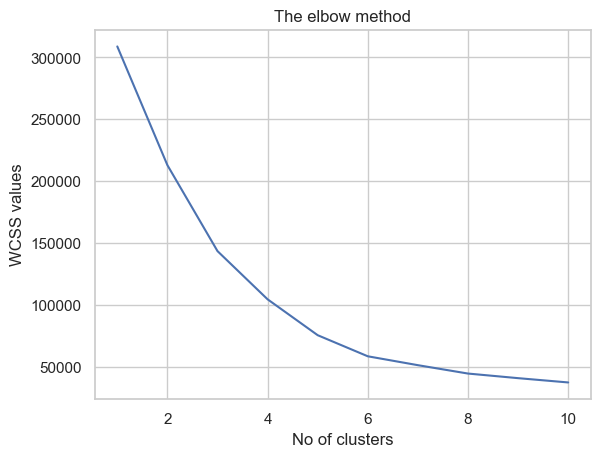

In [59]:
plt.plot(range(1,11), wcss)
plt.title("The elbow method",loc='center')
plt.xlabel("No of clusters")
plt.ylabel("WCSS values")


In [63]:
kmeansmodel = KMeans(n_clusters=6,init='k-means++',random_state=0)

In [64]:
y_means = kmeansmodel.fit_predict(x)

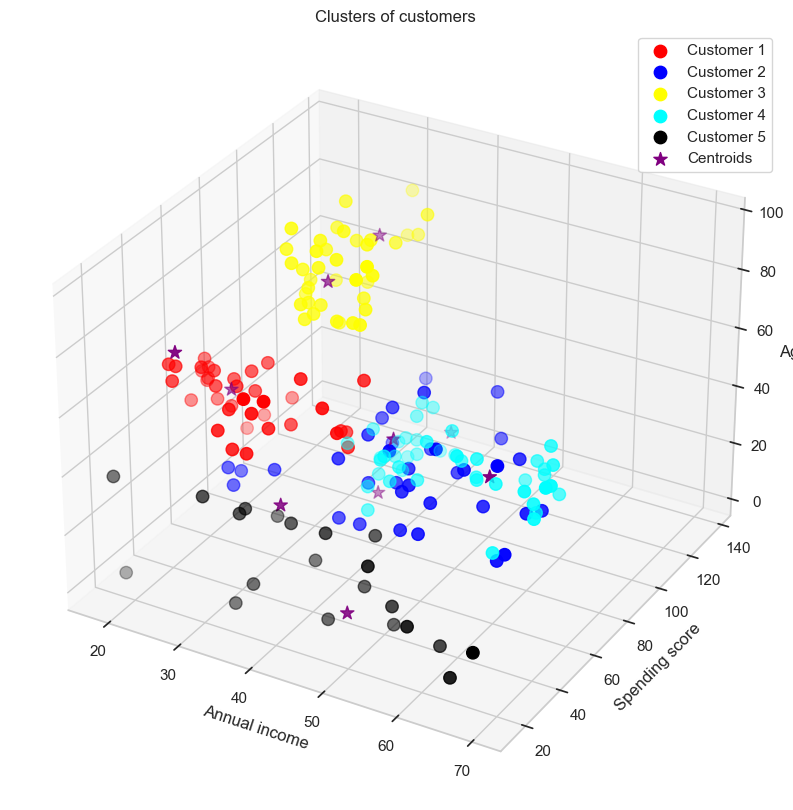

In [72]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting module


# Assuming X contains your data with columns for annual income, spending score, and age
# Modify this according to your data structure

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D axes

# Scatter points for each cluster, including age
ax.scatter(x[y_means == 0, 0], x[y_means == 0, 1], x[y_means == 0, 2], s=80, c="red", label="Customer 1")
ax.scatter(x[y_means == 1, 0], x[y_means == 1, 1], x[y_means == 1, 2], s=80, c="blue", label="Customer 2")
ax.scatter(x[y_means == 2, 0], x[y_means == 2, 1], x[y_means == 2, 2], s=80, c="yellow", label="Customer 3")
ax.scatter(x[y_means == 3, 0], x[y_means == 3, 1], x[y_means == 3, 2], s=80, c="cyan", label="Customer 4")
ax.scatter(x[y_means == 4, 0], x[y_means == 4, 1], x[y_means == 4, 2], s=80, c="black", label="Customer 5")

# Scatter centroids
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
            s=100, c="purple", marker="*", label="Centroids")

# Set labels and legend
ax.set_title("Clusters of customers")
ax.set_xlabel("Annual income")
ax.set_ylabel("Spending score")
ax.set_zlabel("Age")
ax.legend()


